In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/creditcardfraud'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
pd.set_option("display.float", "{:.2f}".format)
df.describe

<bound method NDFrame.describe of             Time     V1    V2    V3    V4    V5    V6    V7    V8    V9  ...  \
0           0.00  -1.36 -0.07  2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ...   
1           0.00   1.19  0.27  0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ...   
2           1.00  -1.36 -1.34  1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...   
3           1.00  -0.97 -0.19  1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ...   
4           2.00  -1.16  0.88  1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ...   
...          ...    ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
284802 172786.00 -11.88 10.07 -9.83 -2.07 -5.36 -2.61 -4.92  7.31  1.91  ...   
284803 172787.00  -0.73 -0.06  2.04 -0.74  0.87  1.06  0.02  0.29  0.58  ...   
284804 172788.00   1.92 -0.30 -3.25 -0.56  2.63  3.03 -0.30  0.71  0.43  ...   
284805 172788.00  -0.24  0.53  0.70  0.69 -0.38  0.62 -0.69  0.68  0.39  ...   
284806 172792.00  -0.53 -0.19  0.70 -0.51 -0.01 -0.65  1.58 -0.41  0.49  ...   

     

## EDA

/tmp/ipykernel_35/321579238.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


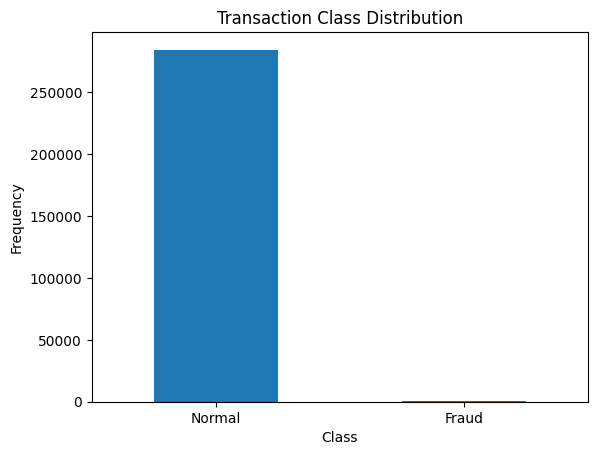

In [7]:
import matplotlib.pyplot as plt
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
fraud_transactions = df[df['Class'] == 1]
normal_transactions = df[df['Class'] == 0]
print(fraud_transactions.shape)
print(normal_transactions.shape)

(492, 31)
(284315, 31)


In [10]:
pd.concat([fraud_transactions.Amount.describe(), normal_transactions.Amount.describe()], axis = 1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


In [11]:
pd.concat([fraud_transactions.Time.describe(), normal_transactions.Time.describe()], axis = 1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_35/4106395423.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


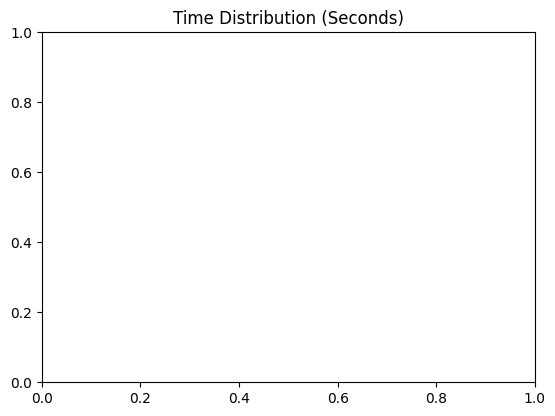

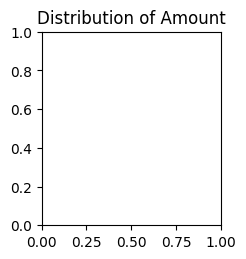

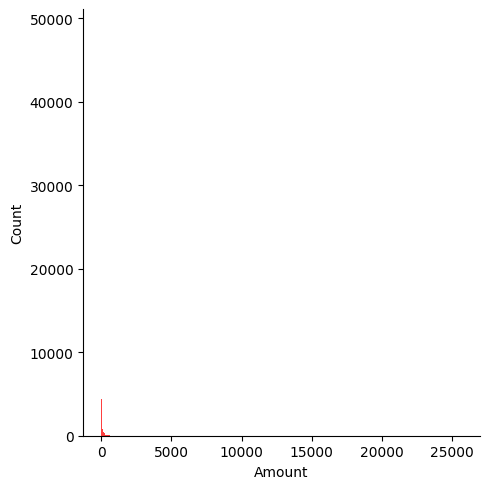

In [12]:
import seaborn as sns
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.displot(df['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.displot(df['Amount'],color='red');

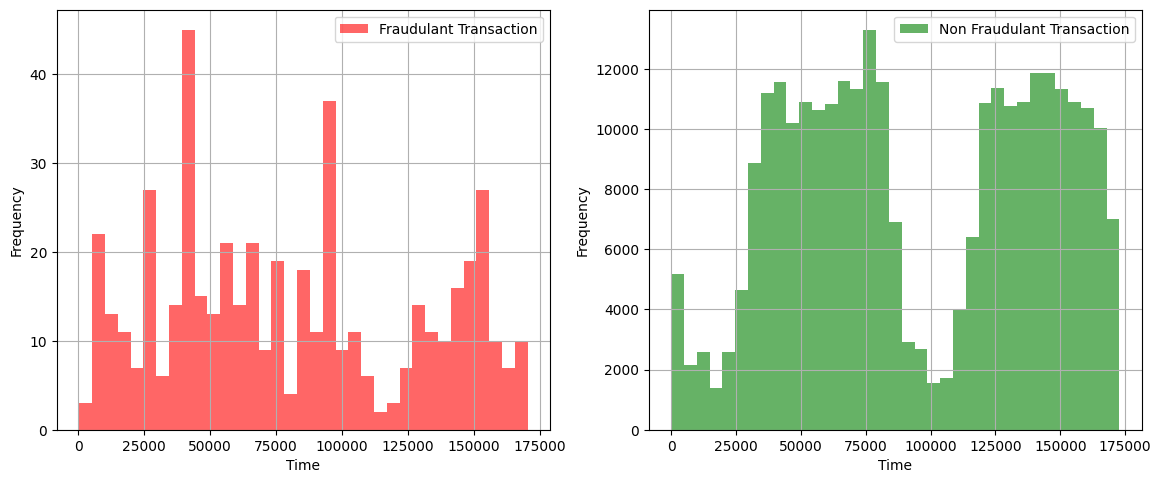

In [13]:
plt.figure(figsize=(14, 12))
#Fraudulant Transactions
plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend()
#Normal Transactions
plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='green', alpha=0.6, label="Non Fraudulant Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend()

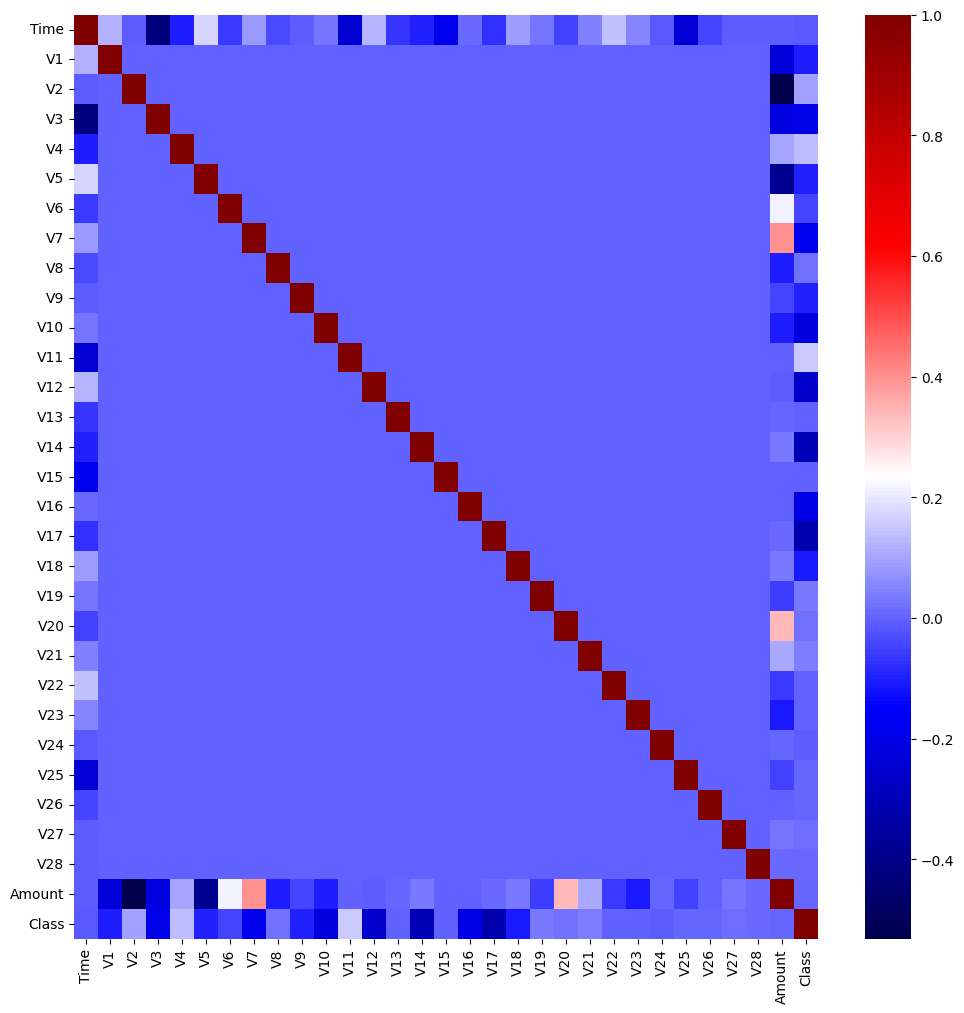

In [14]:
# Heatmap to find any high correlations among the columns
df_corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, cmap="seismic")
plt.show();

# Data Preprocessing

## Splitting the data

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into features(X) and traget variable(y)
X = df.drop('Class', axis=1)
y = df.Class

#Now splitting X and y into testing and training data
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

#Further splitting the training data into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#Standardising the features
X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

#Calculating the class weights
weight_normal = y_train.value_counts()[0] / len(y_train)
weight_fraud = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {weight_normal}")
print(f"Non-Fraudulant transaction weight: {weight_fraud}")

Fraudulant transaction weight: 0.9982005254214972
Non-Fraudulant transaction weight: 0.0017994745785028623


In [17]:
#Calculating the ranges of each of the splitted data
#\n: This escape sequence inserts a newline character, moving the cursor to the next line.
#{'_'*55}: This is a Python expression within curly braces. {'_'*55} generates a string containing 55 underscores ('_') concatenated together.
#{'_'*50}: Similar to the previous expression, {'_'*50} generates a string containing 50 underscores ('_').

print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*55}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
_______________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [18]:
#Importing the libs for evaluating the classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

#Defining a function to score the classifier
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# Model Building

## Artificial Neural Networks

#### model = keras.Sequential([...]): This creates a sequential model, which is a linear stack of layers. The layers are defined sequentially inside the square brackets [].

#### keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)): This adds a dense layer to the model with 256 neurons. The activation='relu' argument specifies that the Rectified Linear Unit (ReLU) activation function should be applied to the output of this layer. The input_shape=(X_train.shape[-1],) argument defines the shape of the input data for the first layer. X_train.shape[-1] returns the number of features in the training data.

#### keras.layers.BatchNormalization(): This adds a batch normalization layer to the model. Batch normalization is a technique used to improve the training speed and stability of neural networks by normalizing the inputs of each layer.

#### keras.layers.Dropout(0.3): This adds a dropout layer to the model with a dropout rate of 0.3. Dropout is a regularization technique that randomly sets a fraction of input units to zero during training, which helps prevent overfitting.

#### The next two lines add similar layers as described in steps 3-5. These layers create a deep neural network with three hidden layers, each containing 256 neurons, ReLU activation, batch normalization, and dropout.

#### keras.layers.Dense(1, activation='sigmoid'): This adds the output layer to the model with a single neuron. The activation='sigmoid' argument specifies that the sigmoid activation function should be applied to the output of this layer. Sigmoid activation function squashes the output between 0 and 1, which is suitable for binary classification tasks.

#### model.summary(): This prints a summary of the model architecture, including the type of layers, output shape, and number of parameters. It provides a useful overview of the model's structure, making it easier to debug and optimize.

In [19]:
#Importing Keras Module from TensorFlow
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,849 (558.00 KB)

 Trainable params: 141,313 (552.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [22]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.keras')]
class_weight = {0:weight_normal, 1:weight_fraud}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
47/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 29.5106 - fp: 24198.2773 - loss: 0.8560 - precision: 0.0023 - recall: 0.6324 - tn: 24864.9141 - tp: 59.2979

I0000 00:00:1712860872.254010      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712860872.272024      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 36.0513 - fp: 38882.6289 - loss: 0.8357 - precision: 0.0026 - recall: 0.6965 - tn: 41866.3477 - tp: 107.7308

W0000 00:00:1712860877.665196      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


78/78 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - fn: 36.2278 - fp: 39331.7227 - loss: 0.8351 - precision: 0.0026 - recall: 0.6981 - tn: 42410.3555 - tp: 109.3671 - val_fn: 8.0000 - val_fp: 4735.0000 - val_loss: 0.6337 - val_precision: 0.0127 - val_recall: 0.8841 - val_tn: 35069.0000 - val_tp: 61.0000
Epoch 2/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - fn: 20.8861 - fp: 32289.0000 - loss: 0.7026 - precision: 0.0038 - recall: 0.8481 - tn: 49451.4688 - tp: 126.3165 - val_fn: 11.0000 - val_fp: 1115.0000 - val_loss: 0.5525 - val_precision: 0.0494 - val_recall: 0.8406 - val_tn: 38689.0000 - val_tp: 58.0000
Epoch 3/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - fn: 21.5063 - fp: 25403.8730 - loss: 0.6255 - precision: 0.0058 - recall: 0.8685 - tn: 56322.1016 - tp: 140.1899 - val_fn: 12.0000 - val_fp: 318.0000 - val_loss: 0.5092 - val_precision: 0.1520 - val_recall: 0.8261 - val_tn: 39486.0000 - val_tp: 57.0000
Epoch 4/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - fn: 20.7975 - fp: 18819.4805 - loss: 0

In [23]:
score_ann = model.evaluate(X_test, y_test)
print(score_ann)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - fn: 15.6606 - fp: 5.8043 - loss: 0.0050 - precision: 0.9272 - recall: 0.7744 - tn: 42691.7578 - tp: 54.7436
[0.0036350402515381575, 27.0, 14.0, 0.8861788511276245, 0.8014705777168274, 85293.0, 109.0]


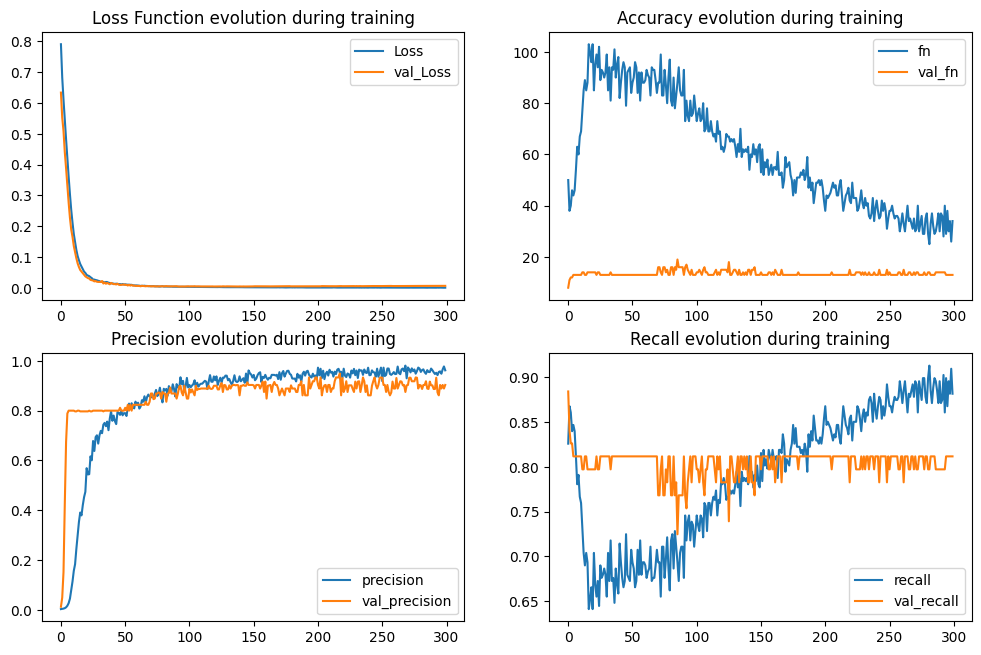

In [24]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

4985/4985 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   0.94      1.00       0.97          1.00
f1-score       1.00   0.97      1.00       0.99          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [    16    271]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.89      1.00       0.94          1.00
recall        1.00   0.80      1.00       0.90          1.00
f1-score      1.00   0.84      1.00       0.92          1.00
support   85307.00 136.00      1.00   854

## Thats's it for now!!